In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

stocks = ['TSLA', 'AMZN', 'EBAY', 'AAPL', 'MSFT', 'META', 'GOOGL',
          'NFLX', 'IBM', 'NVDA']
          
indices = ['^GSPC', 'BTC-USD']

prices = pdr.get_data_yahoo(stocks, start="2019-01-01", end="2022-12-31")[['Adj Close']]
factor = pdr.get_data_yahoo(indices, start="2019-01-01", end="2022-12-31")[['Adj Close']]
print( prices.head() )

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  2 of 2 completed
            Adj Close                                                          \
                 AAPL       AMZN       EBAY      GOOGL        IBM        META   
Date                                                                            
2019-01-02  38.047050  76.956497  27.197369  52.734001  89.489326  135.679993   
2019-01-03  34.257286  75.014000  26.697729  51.273499  87.702782  131.740005   
2019-01-04  35.719692  78.769501  27.310490  53.903500  91.128258  137.949997   
2019-01-07  35.640190  81.475502  27.781849  53.796001  91.772957  138.050003   
2019-01-08  36.319611  82.829002  28.281490  54.268501  93.077896  142.529999   

                                                         
                 MSFT        NFLX       NVDA       TSLA  
Date                                                     
2019-01-02  96.632660  267.660004  33

Q1 (a) alpha is the active return of an investment, beta is the responsiveness to the market return, ft is the excess return on the market, epsilon_t is the residual (random) returns

In [ ]:
print("This is Q1 (b)")
import cvxpy as cp
import numpy as np
import pandas as pd
factor = factor.dropna() # since we need to use log return, it will be meaningless if we fill nan with 0
print( factor.index )
print( prices.index )
X = prices[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1)  
X = np.array(X)
T, N = X.shape  # number of days, number of stocks
f = factor[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close', axis=1)
f = np.array(f)
alpha = cp.Variable( N )
beta0 = cp.Variable( N )
beta1 = cp.Variable( N )
sum = cp.sum_squares(( X[0,:] - alpha - beta0*f[0,0] - beta1*f[0,1] ))
for i in range(1,N):
  sum += cp.sum_squares(( X[i,:] - alpha - beta0*f[i,0] - beta1*f[i,1] ))
objective = cp.Minimize( sum )
# create problem
prob = cp.Problem(objective)
# solve it!
result = prob.solve()

beta = np.array(beta0.value)
a = np.array(beta1.value)
beta = np.vstack( ( np.array(beta0.value), np.array(beta1.value) ) )
beta = pd.DataFrame( beta )
print( "beta ",beta )
print( "alpha: ",alpha.value )

This is Q1 (b)
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)
beta            0        1         2         3         

In [ ]:
print("This is Q1 (c)")
X = prices[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1) 
print("X: ", X)
f = factor[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close', axis=1)
F = np.ones( len(X) )
F = pd.DataFrame(F)
F = pd.concat([F,f], axis = 1)
print("F: ",F)

This is Q1 (c)
X:            AAPL      AMZN      EBAY     GOOGL       IBM      META      MSFT  \
0    -0.104925 -0.025566 -0.018542 -0.028086 -0.020166 -0.029469 -0.037482   
1     0.041803  0.048851  0.022693  0.050021  0.038314  0.046061  0.045460   
2    -0.002228  0.033777  0.017112 -0.001996  0.007050  0.000725  0.001275   
3     0.018884  0.016476  0.017825  0.008745  0.014119  0.031937  0.007225   
4     0.016839  0.001713  0.009620 -0.003433  0.007151  0.011857  0.014198   
...        ...       ...       ...       ...       ...       ...       ...   
1002 -0.002802  0.017274  0.001245  0.016612  0.005451  0.007824  0.002265   
1003 -0.013976 -0.026266 -0.002243 -0.020836  0.005421 -0.009876 -0.007442   
1004 -0.031166 -0.014801 -0.004000 -0.015801 -0.016995 -0.010839 -0.010308   
1005  0.027931  0.028436  0.046497  0.027858  0.007400  0.039347  0.027255   
1006  0.002466 -0.002141 -0.008404 -0.002490 -0.001206  0.000665 -0.004950   

          NFLX      NVDA      TSLA  
0     0

In [ ]:
print("This is Q1 (d)")
factor = factor.dropna() # since we need to use log return, it will be meaningless if we fill nan with 0
X = prices[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1)  
T, N = X.shape  # number of days, number of stocks
f = factor[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close', axis=1)
f1 = f[ '^GSPC' ]
f0 = f[ 'BTC-USD' ]
beta_vec0 = np.array([np.cov(X[stock], y=f0.T)[0, 1]/np.cov(f0, f0)[0, 0] for stock in X.columns]).reshape((N, 1))
beta0 = pd.DataFrame(beta_vec0.reshape((1, N)), columns = stocks)
beta_vec1 = np.array([np.cov(X[stock], y=f1.T)[0, 1]/np.cov(f1, f1)[0, 0] for stock in X.columns]).reshape((N, 1))
beta1 = pd.DataFrame(beta_vec1.reshape((1, N)), columns = stocks)
beta = beta0
beta = beta.append( beta1 )
print( "beta: ", beta )
meanf = np.array(f.mean())
alpha = X.mean() - beta0*meanf[0] - beta1*meanf[1]
print( "alpha: ",alpha )

This is Q1 (d)
beta:         TSLA      AMZN     EBAY      AAPL      MSFT      META     GOOGL  \
0  0.126170  0.137616  0.08003  0.123473  0.064959  0.151887  0.133899   
0  1.221163  1.025775  0.82046  1.113074  0.830199  1.253835  1.179592   

       NFLX       IBM      NVDA  
0  0.149672  0.222223  0.252197  
0  1.023241  1.701688  1.462289  
alpha:         AAPL      AMZN      EBAY     GOOGL       IBM      META      MSFT  \
0  0.000572 -0.000542 -0.000042 -0.000178 -0.000597 -0.000865  0.000457   

       NFLX      NVDA      TSLA  
0 -0.000549  0.000477  0.001077  


This is Q1 (e)
[[0.1261701  0.13761567 0.08002975 0.12347265 0.06495923 0.1518869
  0.13389878 0.14967153 0.22222254 0.25219718]]
AMZN


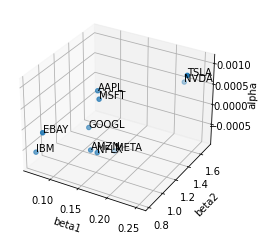

In [ ]:
print( "This is Q1 (e)" )
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(beta0, beta1, alpha)
ax.set_xlabel('beta1')
ax.set_ylabel('beta2')
ax.set_zlabel('alpha')
beta0_array = np.array(beta0)
print( beta0_array )
beta1_array = np.array(beta1)
alpha_array = np.array(alpha)
print( alpha.columns[1] )
for i in range(0,N):
  ax.text( beta0_array[0,i], beta1_array[0,i], alpha_array[0,i], alpha.columns[i] )

Q1 (f)
AAPL is less risky

// Question 2

In [ ]:
import math
print( "This is Q2, (a)" )
stocks_q2 = ['AAPL', 'MSFT', 'GOOGL']
training = pdr.get_data_yahoo(stocks_q2, start="2019-01-01", end="2021-12-31")[['Adj Close']]
test = pdr.get_data_yahoo(stocks_q2, start="2022-01-01", end="2022-12-31")[['Adj Close']]
log_return = training[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1) 
log_return_array = np.array( log_return )
print( log_return )
N = len( stocks_q2 )
cov_vec = []

for i in range(0,3):
  for j in range(0,3):
    cov_vec.append( np.cov( log_return_array[i], log_return_array[j] )[0,1] )
cov_vec = np.array( cov_vec )

cov_sigma = cov_vec.reshape((3, 3))
print( "Covariance Matrix Sigma: ",cov_sigma )
beta = 0.0005
mean_training = np.array(log_return.mean())
print( "Mean mu: ",mean_training )

Diag = np.eye(3)
for i in range(0,3):
  Diag[i,i] = cov_sigma[i,i]
w = cp.Variable( 3 )

rou1 = cp.Parameter(nonneg=True)
rou2 = cp.Parameter(nonneg=True)

Sigma_h = rou1*cov_sigma + (1-rou1)*Diag
mean_h = mean_training*rou2 + (1-rou2)*mean_training/N

E_return = w[0]*mean_h[0]+w[1]*mean_h[1]+w[2]*mean_h[2]
constraints = [E_return >= beta, w >= 0, cp.sum(w) == 1]
var = w @ Sigma_h @ w
objective = cp.Minimize( var )
prob = cp.Problem(objective,constraints)



This is Q2, (a)
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
         AAPL     GOOGL      MSFT
0   -0.104924 -0.028086 -0.037482
1    0.041803  0.050021  0.045460
2   -0.002228 -0.001996  0.001275
3    0.018884  0.008745  0.007224
4    0.016839 -0.003433  0.014198
..        ...       ...       ...
750  0.003637  0.003419  0.004462
751  0.022715  0.006716  0.022921
752 -0.005784 -0.008279 -0.003510
753  0.000502 -0.000218  0.002049
754 -0.006600 -0.003104 -0.007721

[755 rows x 3 columns]
Covariance Matrix Sigma:  [[ 1.75680117e-03  1.53500419e-04  3.72140969e-05]
 [ 1.53500419e-04  1.69541012e-05 -3.43522345e-08]
 [ 3.72140969e-05 -3.43522345e-08  3.83667014e-06]]
Mean mu:  [0.00203546 0.00135062 0.00164795]


This is Q2, (b)
          0.0       0.2       0.4       0.6       0.8       1.0
0.0  0.300633  0.420887  0.541140  0.661393  0.781647  0.901900
0.2  0.273162  0.382427  0.491692  0.600956  0.710221  0.819486
0.4  0.305468  0.427655  0.549842  0.672029  0.794216  0.916403
0.6  0.365480  0.511672  0.657864  0.804057  0.950249  1.096441
0.8  0.495354  0.693496  0.891638  1.089779  1.287921  1.486063
1.0  0.481504  1.825482  1.479468  1.826105  2.174379  2.539295


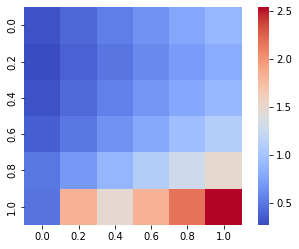

In [ ]:
print( "This is Q2, (b)" )
import seaborn as sns
pair = [0,0.2,0.4,0.6,0.8,1]
ratio = []

for i in pair:
  for j in pair:
    rou1.value = i
    rou2.value = j
    Sigma_h = rou1*cov_sigma + (1-rou1)*Diag
    mean_h = mean_training*rou2 + (1-rou2)*mean_training/N
    E_return = w[0]*mean_h[0]+w[1]*mean_h[1]+w[2]*mean_h[2]
    constraints = [E_return >= beta, w >= 0, cp.sum(w) == 1]
    var = cp.quad_form(w, Sigma_h.value)
    objective = cp.Minimize( var )
    prob = cp.Problem(objective,constraints)
    result = prob.solve()
    std = math.sqrt( var.value )
    sharpe_ratio = E_return/std
    ratio.append( sharpe_ratio.value )
ratio = np.array(ratio)
ratio = ratio.reshape( (6,6) )
Psi = pd.DataFrame(ratio, index = pair, columns = pair)
print( Psi )
ax = sns.heatmap(
    Psi, 
    cmap='coolwarm',
    square=True
)
plt.show()

In [ ]:
print( "This is Q2 (c)" )
log_test = test[['Adj Close']].apply(np.log).apply(np.diff).xs('Adj Close',axis=1) 
log_test_array = np.array( log_test )

cov_vec = []

for i in range(0,3):
  for j in range(0,3):
    cov_vec.append( np.cov( log_test_array[i], log_test_array[j] )[0,1] )
cov_vec = np.array( cov_vec )

cov_sigma = cov_vec.reshape((3, 3))
print( "Covariance Matrix Sigma: ",cov_sigma )

mean_test = np.array(log_test.mean())
print( "Mean mu: ",mean_test )

beta = 0.0005
w_test = cp.Variable( 3 )
E_return = w_test[0]*mean_test[0]+w_test[1]*mean_test[1]+w_test[2]*mean_test[2]
constraints = [E_return >= beta, w_test >= 0, cp.sum(w_test) == 1]
var = cp.quad_form(w_test, cov_sigma)
objective = cp.Minimize( var )
prob = cp.Problem(objective,constraints)
result = prob.solve()
print( w_test.value )

This is Q2 (c)
Covariance Matrix Sigma:  [[ 4.50305064e-05 -3.69612612e-05  3.43793978e-05]
 [-3.69612612e-05  1.01607954e-04 -8.36059751e-05]
 [ 3.43793978e-05 -8.36059751e-05  6.92915635e-05]]
Mean mu:  [-0.00132512 -0.00198691 -0.00129668]
None
